### Setting the Stage -  Importing necessary libraries, and setting the path(s) needed to build the model!

In [94]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### Understanding the Input - Reading and interpreting the basic details of our dataset 

In [6]:
# Reading the input dataset along with column names
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
input_data = pd.read_csv('iris.data', names=column_names)

In [64]:
# Shape of input data
input_data.shape

(150, 5)

In [65]:
# First look at the dataset - to see how it looks!
input_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# Type of classes available (useful in a classification problem)
input_data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:
# Number of instances of each class
input_data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
# A more statistical peep into the dataset
input_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<font color='brown'>
    Some insights from the input_data that we have

* There are 3 classes of Iris flowers - Iris-setosa, Iris-versicolor, Iris-virginica
* There are a total of 150 rows in our dataset 
* Sepal details: <br>
    &emsp; Mean-length: 5.8 <br>
    &emsp; Mean-width:  3.05
* Petal details: <br>
    &emsp; Mean-length: 3.75 <br>
    &emsp; Mean-width:  1.19



</font>

### Visualizing the data - Plotting diagrams and graphs with the data

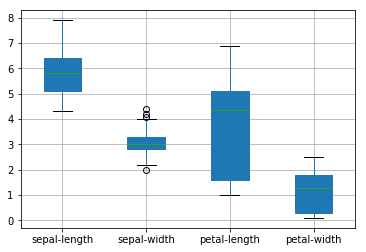

In [10]:
# Plotting BOX PLOTS for the features
features = pd.DataFrame(input_data);
features.plot.box(grid='True', patch_artist=True);

<font color='brown'>
    Box-plots could tell us 5 important aspects of data: <br>
        &emsp;* Minimum value <br>
        &emsp;* First quartile(Q1)  <br>
        &emsp;* Median (second quartile (Q2)) <br>
        &emsp;* Third quartile (Q3)<br>
        &emsp;* Maximum

<Figure size 576x576 with 0 Axes>

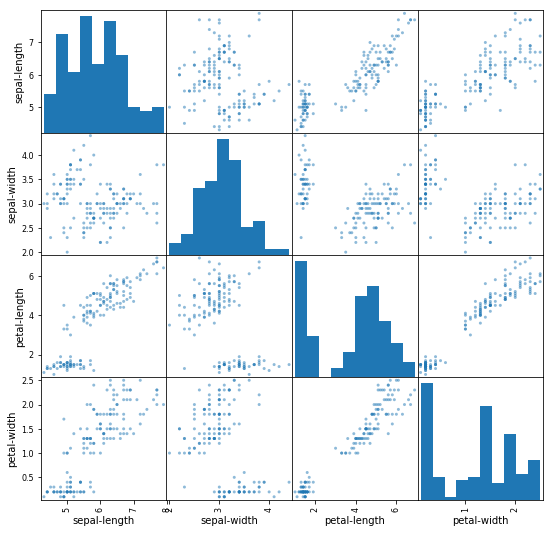

In [11]:
# Plotting SCATTER MATRIX (scatter plots) for ALL combinations of the features
plt.figure(figsize=(8,8))
scatter_matrix(input_data, figsize = (9,9));

<font color='brown'>
    A scatter matrix is a pair-wise scatter plot of several variables presented in a matrix format.<br> 
    It can be used to determine whether the variables are correlated and whether the correlation is positive or negative.

### Data Prepping - Getting data ready to build the model(s)

In [12]:
# Check if there are any missing values
input_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

<font color='brown'>
    This shows there is NO missing values in our input dataset. So, there is no need to impute of fill-in the missing values

In [16]:
# Input data type of each features
input_data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

<font color='brown'>
    Here, class is of type 'object', which means it is a string or some text

In [29]:
# Decide the input (X) and output (Y)
# X - all features of the iris flowers {sepal-length, sepal-width, petal-length, petal-width}
# y - the class {'Iris-setosa','Iris-versicolor','Iris-virginica'}
values = input_data.values
X = values[:,0:4]
y = values[:,4]
# [:,0:4] indicates select (:) all rows, and (0 to 4) columns
# [:, 4] indicates select (:) all rows, and (4th) column

<font color='brown'>
    We have only one dataset with which we should both train the model, and make predictions on the same - which doesn't make sense!<br>
    Because, we would like to see how our model performs and predicts on new data (the data it has never seen) <br>
    To achieve this, we usually split the dataset into two parts - "training set", and "test set". <br>
    The 'train:test' split can be our choice, but would be good if we split is as '75:25' or '80:20' so that our model is better trained
  

In [32]:
# test_size — decides the size of the data that has to be split as the test dataset 
# (0.5 - 50% training set and 50% test set | 0.2 - 80% training and 20% test)
# random_state — this acts as the seed for the random number generator during the split.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# Before building the model, it is important to check the shape of all the data we have for Consistency
print("train_X:", train_X.shape)
print("train_y:", train_y.shape)
print("test_X:", test_X.shape)
print("test_y:", test_y.shape)

train_X: (120, 4)
train_y: (120,)
test_X: (30, 4)
test_y: (30,)


<font color='brown'>
Perfect! Now that we have our training and testing data ready, it is time to build our model!


### The Model - Building the model

<font color='brown'>
    * Before building the model, we need to understand the kind of problem involved here <br>
    * We are going to predict the category of Iris flower based on the input features, out of all 3 classes <br>
    * THIS IS A CLASSIFICATION PROBLEM <br>
    * Instead of building one classification model, let us try building multiple classification models to see which has the highest accuracy <br>
    * Building a model happens in 3 - 4 steps:<br>
                 &emsp; |__ Instantiating the model to an object with required hyperparameters <br>
                 &emsp; |__ Fitting the model with the training data -- this is "training the model"<br>
                 &emsp; |__ After training, making predictions with the trained model<br>
                 &emsp; |__ Once we have the predictions, it is important to figure out the "Accuracy of the model"<br>
                 &emsp; |__ If required accuracy is not achieved, we can iterate from step-1 after tuning some hyperparameters
            

#### _Model # 1 - Logistic Regression_

In [97]:
logreg_model = LogisticRegression(solver='liblinear', multi_class='ovr')
logreg_model.fit(train_X, train_y);
lr_prediction = logreg_model.predict(test_X);
print("Accuracy of Linear Regression: {:0.2f}%".format(accuracy_score(test_y, lr_prediction)*100))

Accuracy of Linear Regression: 96.67%


#### _Model # 2 - Decision Tree Classifier_

In [98]:
dectree_model = DecisionTreeClassifier()
dectree_model.fit(train_X, train_y);
dectree_prediction = dectree_model.predict(test_X);
print("Accuracy of Decision Tree Classifier: {:0.2f}%".format(accuracy_score(test_y, dectree_prediction)*100))

Accuracy of Decision Tree Classifier: 100.00%


#### _Model # 3 - Random Forest Classifier_

In [142]:
randfor_model = RandomForestClassifier(n_estimators=10, min_samples_split=4, min_samples_leaf=1, random_state=0)
randfor_model.fit(train_X, train_y);
randfor_prediction = randfor_model.predict(test_X);
print("Accuracy of Random Forest Classifier(before tuning): {:0.2f}%".format(accuracy_score(test_y, randfor_prediction)*100))

Accuracy of Random Forest Classifier(before tuning): 96.67%


<font color='brown'>
    As we can see, with the first set of hyperparameters, we get an accuracy score of 96.67% <br>
    Now let's try changing one of those parameters

In [143]:
randfor_model = RandomForestClassifier(n_estimators=10, min_samples_split=4, min_samples_leaf=4, random_state=0)
randfor_model.fit(train_X, train_y);
randfor_prediction = randfor_model.predict(test_X);
print("Accuracy of Random Forest Classifier(after tuning): {:0.2f}%".format(accuracy_score(test_y, randfor_prediction)*100))

Accuracy of Random Forest Classifier(after tuning): 100.00%


<font color='brown'>
    After changing the parameter from "min_sample_leaf=1" to "min_sample_leaf=4", we've got an accuracy of 100%<br>
    This is called "Hyper Parameter Tuning"